<a href="https://colab.research.google.com/github/R-Damanhuri/Sentiment-Analysis-Twitter-App-Review-IndoBERT/blob/main/SmSA_Twitter_Application_Score_Based_Label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collecting

In [1]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews

In [3]:
import pandas as pd
import numpy as np

In [3]:
reviews, continuation_token = reviews(
    'com.twitter.android',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count = 100000
)

In [4]:
df = pd.DataFrame(np.array(reviews),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))

In [5]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2d00906e-94bc-4aa3-980a-dd4aa566a15b,Piscessielf,https://play-lh.googleusercontent.com/a-/AD_cM...,"Hate X, love Twitter",1,49,9.98.0-release.0,2023-07-31 07:58:04,None,None,9.98.0-release.0
1,86d6ed45-904d-4643-8f90-4ca450d6b893,AN26 pro Chanel,https://play-lh.googleusercontent.com/a-/AD_cM...,Good good good 😘😘,5,0,10.0.0-release.0,2023-07-31 07:56:13,None,None,10.0.0-release.0
2,1e6733b7-f1c2-48af-8e27-1fe091ebc5d6,Rici Rici,https://play-lh.googleusercontent.com/a/AAcHTt...,Apk tolol ngk jelas login aja ngk bisa,1,0,10.0.0-release.0,2023-07-31 07:48:32,None,None,10.0.0-release.0
3,863de400-0bdd-4fa9-962b-1e58857479b3,cici pinter,https://play-lh.googleusercontent.com/a/AAcHTt...,JELEK,1,0,None,2023-07-31 07:45:51,None,None,None
4,9fc8cfd1-bb3e-4040-b7ac-cda8d7541ff3,Sofyan Fauzi,https://play-lh.googleusercontent.com/a-/AD_cM...,Gabud ikut ikut,1,0,None,2023-07-31 07:45:36,None,None,None


In [6]:
df.shape

(100000, 11)

In [7]:
df.to_csv('twitter_reviews_raw.csv', index=False, encoding="", na_rep="")

# Data Preparation

## Data Labeling

In [8]:
df_raw = pd.read_csv('twitter_reviews_raw.csv')

In [9]:
df_raw.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2d00906e-94bc-4aa3-980a-dd4aa566a15b,Piscessielf,https://play-lh.googleusercontent.com/a-/AD_cM...,"Hate X, love Twitter",1,49,9.98.0-release.0,2023-07-31 07:58:04,NaN,NaN,9.98.0-release.0
1,86d6ed45-904d-4643-8f90-4ca450d6b893,AN26 pro Chanel,https://play-lh.googleusercontent.com/a-/AD_cM...,Good good good 😘😘,5,0,10.0.0-release.0,2023-07-31 07:56:13,NaN,NaN,10.0.0-release.0
2,1e6733b7-f1c2-48af-8e27-1fe091ebc5d6,Rici Rici,https://play-lh.googleusercontent.com/a/AAcHTt...,Apk tolol ngk jelas login aja ngk bisa,1,0,10.0.0-release.0,2023-07-31 07:48:32,NaN,NaN,10.0.0-release.0
3,863de400-0bdd-4fa9-962b-1e58857479b3,cici pinter,https://play-lh.googleusercontent.com/a/AAcHTt...,JELEK,1,0,NaN,2023-07-31 07:45:51,NaN,NaN,NaN
4,9fc8cfd1-bb3e-4040-b7ac-cda8d7541ff3,Sofyan Fauzi,https://play-lh.googleusercontent.com/a-/AD_cM...,Gabud ikut ikut,1,0,NaN,2023-07-31 07:45:36,NaN,NaN,NaN


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reviewId              100000 non-null  object 
 1   userName              100000 non-null  object 
 2   userImage             100000 non-null  object 
 3   content               100000 non-null  object 
 4   score                 100000 non-null  int64  
 5   thumbsUpCount         100000 non-null  int64  
 6   reviewCreatedVersion  63587 non-null   object 
 7   at                    100000 non-null  object 
 8   replyContent          0 non-null       float64
 9   repliedAt             0 non-null       float64
 10  appVersion            63587 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


In [11]:
df_selected = df_raw[['content','score']].copy()

In [12]:
df_selected.head()

,content,score
0,"Hate X, love Twitter",1
1,Good good good 😘😘,5
2,Apk tolol ngk jelas login aja ngk bisa,1
3,JELEK,1
4,Gabud ikut ikut,1


In [13]:
df_selected.shape

(100000, 2)

In [14]:
df_selected.to_csv('twitter_reviews_selected.csv', index=False, encoding="", na_rep="")

In [15]:
df_labeled = df_selected.copy()

In [16]:
mapper = {
    5: 'positive',
    4: 'positive',
    3: 'neutral',
    2: 'negative',
    1: 'negative'
}

df_labeled['sentiment'] = df_labeled['score'].map(mapper)

In [17]:
df_labeled

,content,score,sentiment
0,"Hate X, love Twitter",1,negative
1,Good good good 😘😘,5,positive
2,Apk tolol ngk jelas login aja ngk bisa,1,negative
3,JELEK,1,negative
4,Gabud ikut ikut,1,negative
...,...,...,...
99995,mantap,5,positive
99996,Ok,1,negative
99997,Aplikasi eek,1,negative
99998,Mntap,5,positive


In [18]:
df_labeled.groupby('score').size()

score
1    33641
2     5027
3     5676
4     7729
5    47927
dtype: int64

In [19]:
df_labeled.groupby('sentiment').size()

sentiment
negative    38668
neutral      5676
positive    55656
dtype: int64

## Data Cleaning

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [22]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
sastrawi_sw = stop_factory.get_stop_words()

In [23]:
df_labeled['content'] = df_labeled['content'].str.lower()

In [24]:
freq_word = pd.DataFrame()
freq_word['word'] = df_labeled['content'].str.split().explode().value_counts().index
freq_word['count'] = df_labeled['content'].str.split().explode().value_counts().values

In [25]:
not_stop_words = ~freq_word['word'].isin(sastrawi_sw)

In [26]:
freq_word[not_stop_words][:75]

,word,count
2,twitter,9955
3,bagus,9567
5,akun,6642
7,aplikasi,5926
9,nya,5525
...,...,...
91,bgt,1185
94,lah,1129
95,jelas,1120
97,fitur,1061


In [27]:
freq_word[not_stop_words][:75]['word'].to_list()

['twitter',
 'bagus',
 'akun',
 'aplikasi',
 'nya',
 'ga',
 'gak',
 'sangat',
 'good',
 'mau',
 'aja',
 'yg',
 'mantap',
 'padahal',
 'banget',
 'buat',
 'update',
 'login',
 'apk',
 'malah',
 'makin',
 'udah',
 'banyak',
 'suka',
 'video',
 'masuk',
 'aku',
 'jadi',
 'gk',
 'buka',
 'kok',
 'kode',
 'jelek',
 'baru',
 'lama',
 'susah',
 'sekarang',
 'nomor',
 'daftar',
 'terus',
 'baik',
 'verifikasi',
 'sama',
 'bintang',
 'sering',
 'apa',
 'no',
 'bikin',
 'the',
 'gabisa',
 'pas',
 'selalu',
 'download',
 'dulu',
 'kasih',
 'i',
 'sih',
 'pake',
 'hp',
 'keren',
 'perbaiki',
 'gw',
 'kalo',
 'sekali',
 'lebih',
 'sendiri',
 'udh',
 'keluar',
 'coba',
 'oke',
 'bgt',
 'lah',
 'jelas',
 'fitur',
 'nice']

In [28]:
more_stopwords = [
 'twitter',
 'aplikasi',
 'nya',
 'sangat',
 'mau',
 'aja',
 'yg',
 'padahal',
 'banget',
 'buat',
 'apk',
 'malah',
 'makin',
 'udah',
 'banyak',
 'aku',
 'jadi',
 'gk',
 'kok',
 'sekarang',
 'nomor',
 'terus',
 'sama',
 'bintang',
 'sering',
 'apa',
 'no',
 'bikin',
 'the',
 'pas',
 'selalu',
 'dulu',
 'kasih',
 'i',
 'sih',
 'pake',
 'hp',
 'gw',
 'kalo',
 'sekali',
 'lebih',
 'sendiri',
 'udh',
 'coba',
 'bgt',
 'lah',
 'jelas'
 ]

In [29]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F999" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [30]:
import string
def preprocess(text):

    text = remove_emoji(text)
    # remove numbers
    text = ''.join(word for word in text if not word.isdigit())

    # remove punctuation
    text = ''.join(word for word in text if word not in string.punctuation)

    # tokenization
    tokens = nltk.word_tokenize(text)

    # remove stopwords and additional stopwords
    stop_words = set(sastrawi_sw + more_stopwords)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # remove extra whitespace
    text = ' '.join(filtered_tokens)
    text = ' '.join(text.split())

    return text


In [31]:
df_labeled['content_cleaned'] = df_labeled['content'].apply(preprocess)

In [32]:
df_cleaned = df_labeled.copy()

In [33]:
df_cleaned = df_cleaned.dropna()

In [34]:
df_cleaned['content_cleaned'].isna().value_counts()

False    100000
Name: content_cleaned, dtype: int64

In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   content          100000 non-null  object
 1   score            100000 non-null  int64 
 2   sentiment        100000 non-null  object
 3   content_cleaned  100000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [36]:
df_cleaned.head()

,content,score,sentiment,content_cleaned
0,"hate x, love twitter",1,negative,hate x love
1,good good good 😘😘,5,positive,good good good
2,apk tolol ngk jelas login aja ngk bisa,1,negative,tolol ngk login ngk
3,jelek,1,negative,jelek
4,gabud ikut ikut,1,negative,gabud ikut ikut


In [37]:
df_cleaned['content_cleaned'].tolist()

['hate x love',
 'good good good',
 'tolol ngk login ngk',
 'jelek',
 'gabud ikut ikut',
 'males ah twt ga seasik mana logonya diganti',
 'gak suka gua ni',
 'x is bad',
 'sejauh cukup memuaskan',
 'kecowaa',
 'register ga perbaiki',
 'bokep',
 'x logonya',
 'semenjak update gaena',
 'autentikasi membingungkan',
 'keren',
 'logonya kek anj minimal nonton ma ngetweet dikit bilangnya nge x gt liat x kan anjg elon you such a fucek',
 'selamat tinggal blue bird',
 'its not same anymore',
 'x maksut',
 'terlalu sensitif',
 '',
 'hei kembalikan',
 'kesini kurang nyaman pakai uninstall',
 'woi balikin logo gwkenapa diplaystore msh burung xgk enak woi liatnyatukar hshebwowniwvehsoqow yw skapb',
 'suka sma logo barunya gua blm update jdi gpp',
 'jlek',
 'sejak dikomersialkan usernya dijadikan alat jual beli berlalih menggunakan bluesky buatan si pencipta',
 'mending u diem deh lon elon',
 'rest is just memory',
 'akun mama ku tersuspen',
 'bagus',
 'jgn pakai ngeselin',
 'perbarui logonya berub

In [38]:
df_cleaned.shape

(100000, 4)

In [39]:
df_cleaned.to_csv('twitter_reviews_cleaned.csv', index=False, encoding="", na_rep="")

## Data Splitting

In [37]:
df_model = pd.read_csv("twitter_reviews_cleaned.csv")

In [38]:
df_model = df_model.dropna()

In [39]:
df_model = df_model.drop(['content','score'],axis=1)

In [40]:
df_model = df_model.rename(columns={'content_cleaned':'text'})

In [41]:
df_model = df_model.reindex(columns=['text','sentiment'])

In [42]:
from sklearn.model_selection import train_test_split

df_trainVal, df_test = train_test_split(df_model, shuffle=True, test_size=0.2)

In [43]:
df_trainVal.shape

(74316, 2)

In [44]:
df_test.shape

(18580, 2)

In [45]:
df_train, df_val = train_test_split(df_trainVal, shuffle=True, test_size=0.3)

In [46]:
df_train.shape

(52021, 2)

In [47]:
df_val.shape

(22295, 2)

In [48]:
df_train.to_csv("train.tsv", sep="\t", index=False, header=None)
df_val.to_csv("eval.tsv", sep="\t", index=False, header=None)
df_test.to_csv("test.tsv", sep="\t", index=False, header=None)

# Exploratory Data Analysis

In [50]:
import seaborn as sns

In [51]:
df_explored = pd.read_csv('twitter_reviews_cleaned.csv')

In [52]:
df_explored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   content          100000 non-null  object
 1   score            100000 non-null  int64 
 2   sentiment        100000 non-null  object
 3   content_cleaned  92896 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [53]:
df_explored['content_cleaned'].isna().value_counts()

False    92896
True      7104
Name: content_cleaned, dtype: int64

In [54]:
df_explored = df_explored.dropna()

In [55]:
df_explored['content_cleaned'].isna().value_counts()

False    92896
Name: content_cleaned, dtype: int64

## General

Distribusi Rating

<Axes: xlabel='score', ylabel='count'>

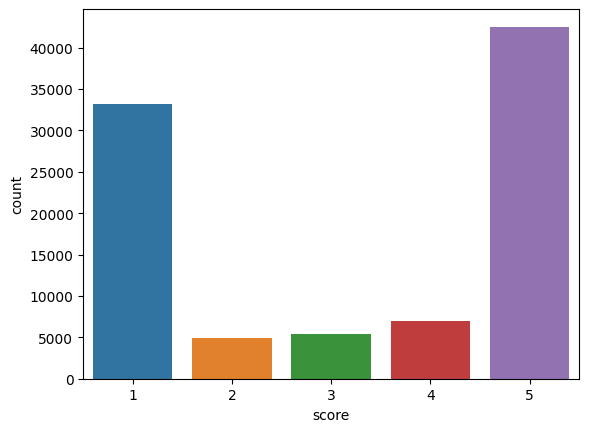

In [56]:
sns.countplot(data = df_explored, x = 'score')

Distribusi Sentimen

<Axes: xlabel='sentiment', ylabel='count'>

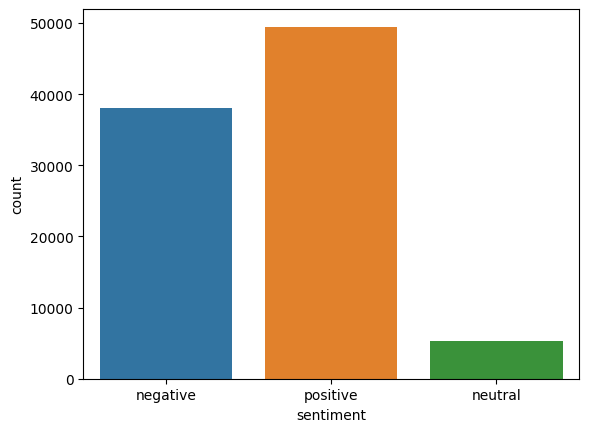

In [57]:
sns.countplot(data = df_explored, x = 'sentiment')

In [58]:
df_explored['review_len'] = df_explored['content'].astype(str).apply(len)
df_explored['word_count'] = df_explored['content'].apply(lambda x: len(str(x).split()))

array([[<Axes: title={'center': 'review_len'}>,
        <Axes: title={'center': 'word_count'}>]], dtype=object)

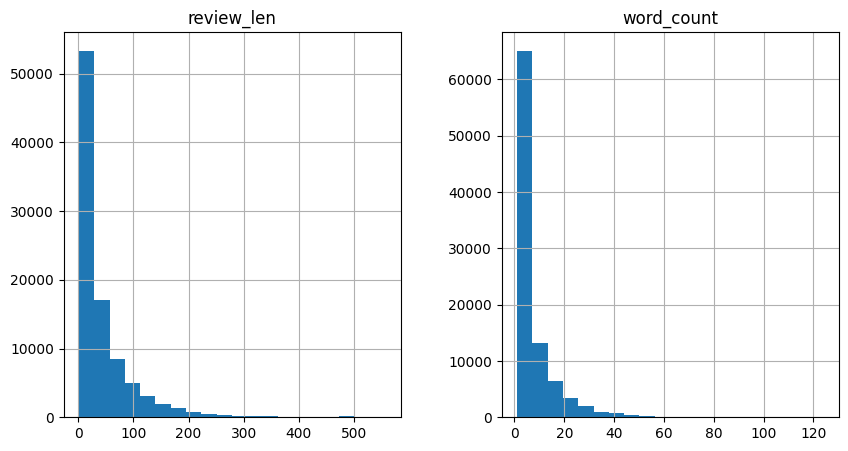

In [59]:
df_explored[["review_len", "word_count"]].hist(bins=20, figsize=(10, 5))

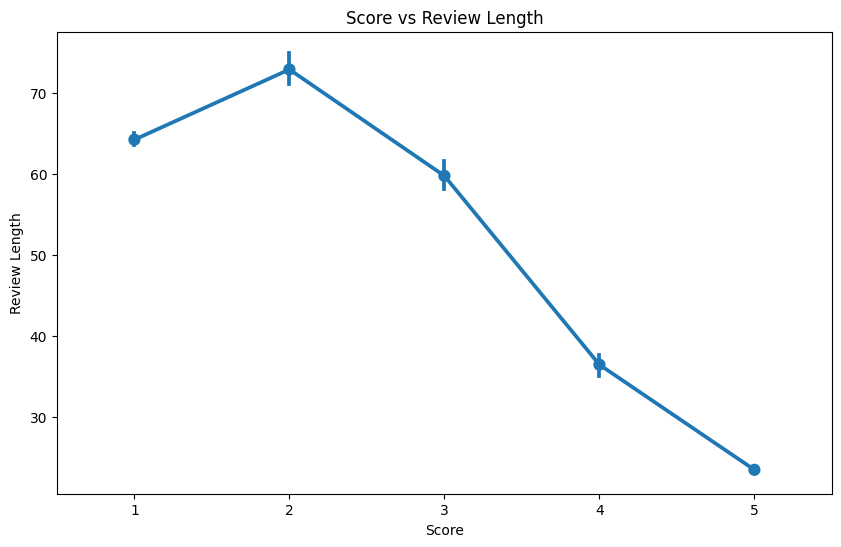

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.pointplot(x = "score", y = "review_len", data = df_explored)
plt.xlabel("Score")
plt.ylabel("Review Length")
plt.title("Score vs Review Length")
plt.show()

In [61]:
all_word = df_explored['content_cleaned'].str.split().explode().value_counts().index
all_word_freq = df_explored['content_cleaned'].str.split().explode().value_counts().values

<Axes: >

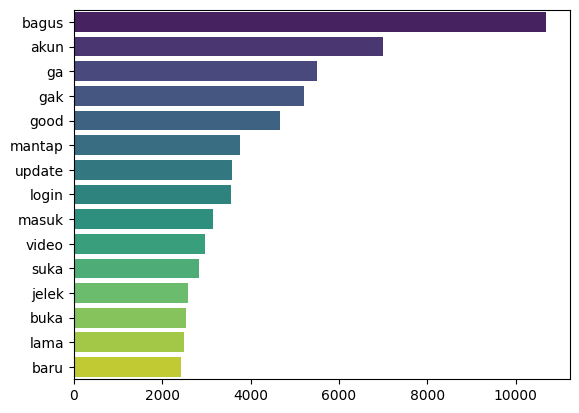

In [62]:
sns.barplot(y=all_word[:15], x=all_word_freq[:15], palette = "viridis")

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [67]:
all_bigram = get_top_n_bigram(df_explored['content_cleaned'], 20)
df_all_bigram = pd.DataFrame(all_bigram, columns=['Review', "Count"])

<Axes: xlabel='Count', ylabel='Review'>

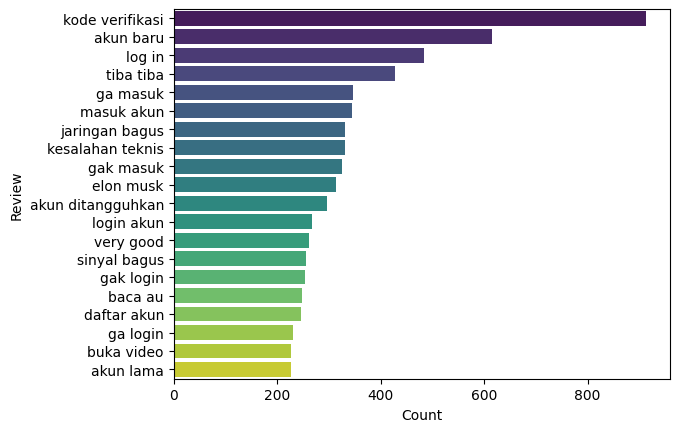

In [68]:
sns.barplot(y=df_all_bigram['Review'], x=df_all_bigram['Count'], palette = "viridis")

In [69]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [70]:
all_trigram = get_top_n_trigram(df_explored['content_cleaned'], 20)
df_all_trigram = pd.DataFrame(all_trigram, columns=['Review', "Count"])

<Axes: xlabel='Count', ylabel='Review'>

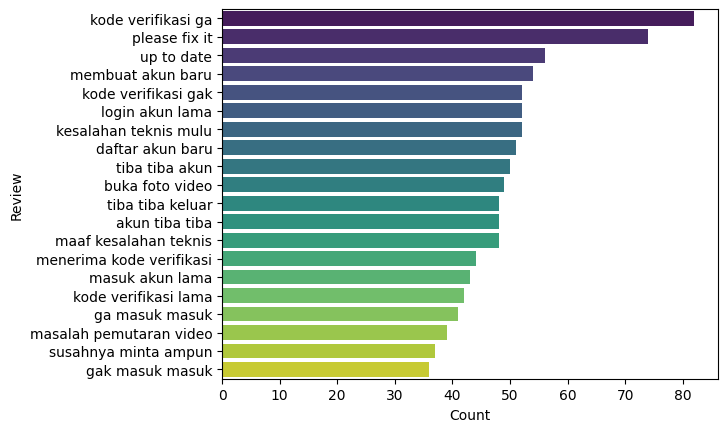

In [71]:
sns.barplot(y=df_all_trigram['Review'], x=df_all_trigram['Count'], palette = "viridis")

In [72]:
df_pos = df_explored[df_explored['sentiment']=='positive']
df_neu = df_explored[df_explored['sentiment']=='neutral']
df_neg = df_explored[df_explored['sentiment']=='negative']

## Positive

In [73]:
pos_word = df_pos['content_cleaned'].str.split().explode().value_counts().index
pos_word_freq = df_pos['content_cleaned'].str.split().explode().value_counts().values

<Axes: >

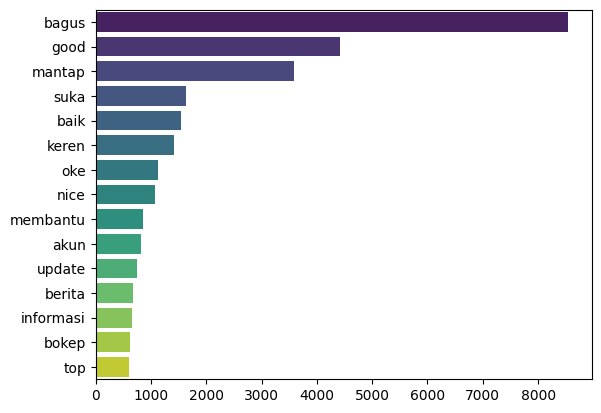

In [74]:
sns.barplot(y=pos_word[:15], x=pos_word_freq[:15], palette = "viridis")

In [75]:
pos_bigram = get_top_n_bigram(df_pos['content_cleaned'], 20)
df_pos_bigram = pd.DataFrame(all_bigram, columns=['Review', "Count"])

<Axes: xlabel='Count', ylabel='Review'>

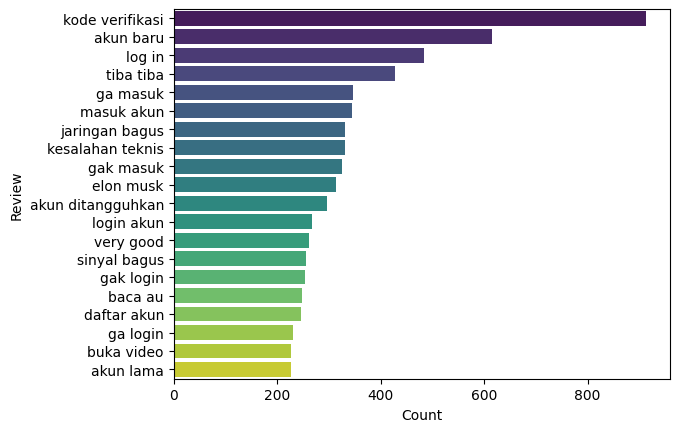

In [76]:
sns.barplot(y=df_pos_bigram['Review'], x=df_pos_bigram['Count'], palette = "viridis")

In [77]:
pos_trigram = get_top_n_trigram(df_pos['content_cleaned'], 20)
df_pos_trigram = pd.DataFrame(pos_trigram, columns=['Review', "Count"])

<Axes: xlabel='Count', ylabel='Review'>

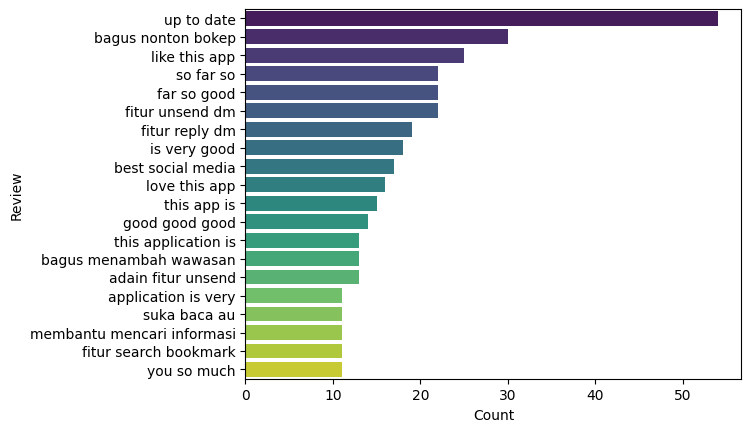

In [79]:
sns.barplot(y=df_pos_trigram['Review'], x=df_pos_trigram['Count'], palette = "viridis")

## Neutral

In [80]:
neu_word = df_neu['content_cleaned'].str.split().explode().value_counts().index
neu_word_freq = df_neu['content_cleaned'].str.split().explode().value_counts().values

<Axes: >

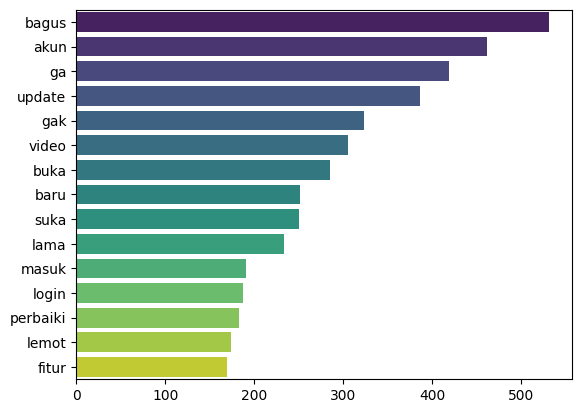

In [81]:
sns.barplot(y=neu_word[:15], x=neu_word_freq[:15], palette = "viridis")

In [82]:
neu_bigram = get_top_n_bigram(df_neu['content_cleaned'], 20)
df_neu_bigram = pd.DataFrame(neu_bigram, columns=['Review', "Count"])

<Axes: xlabel='Count', ylabel='Review'>

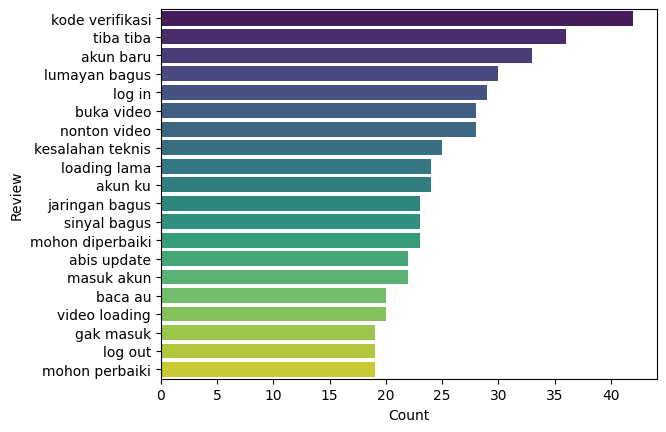

In [83]:
sns.barplot(y=df_neu_bigram['Review'], x=df_neu_bigram['Count'], palette = "viridis")

In [84]:
neu_trigram = get_top_n_trigram(df_neu['content_cleaned'], 20)
df_neu_trigram = pd.DataFrame(neu_trigram, columns=['Review', "Count"])

<Axes: xlabel='Count', ylabel='Review'>

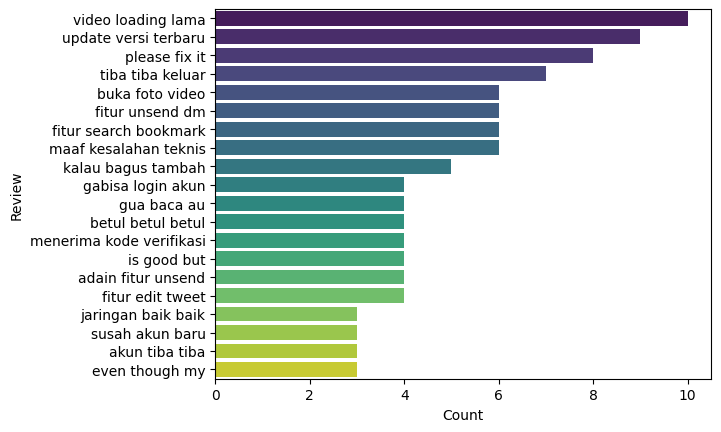

In [85]:
sns.barplot(y=df_neu_trigram['Review'], x=df_neu_trigram['Count'], palette = "viridis")

## Negative

In [86]:
neg_word = df_neg['content_cleaned'].str.split().explode().value_counts().index
neg_word_freq = df_neg['content_cleaned'].str.split().explode().value_counts().values

<Axes: >

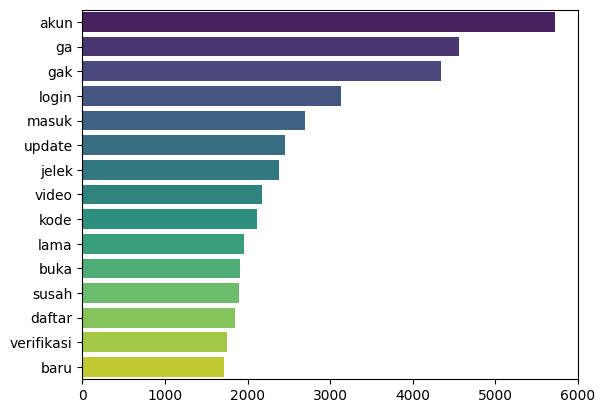

In [87]:
sns.barplot(y=neg_word[:15], x=neg_word_freq[:15], palette = "viridis")

In [88]:
neg_bigram = get_top_n_bigram(df_neg['content_cleaned'], 20)
df_neg_bigram = pd.DataFrame(neg_bigram, columns=['Review', "Count"])

<Axes: xlabel='Count', ylabel='Review'>

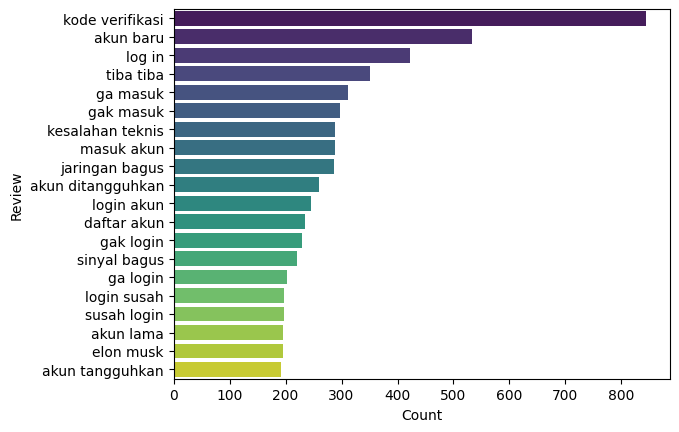

In [89]:
sns.barplot(y=df_neg_bigram['Review'], x=df_neg_bigram['Count'], palette = "viridis")

In [90]:
neg_trigram = get_top_n_trigram(df_neg['content_cleaned'], 20)
df_neg_trigram = pd.DataFrame(neg_trigram, columns=['Review', "Count"])

<Axes: xlabel='Count', ylabel='Review'>

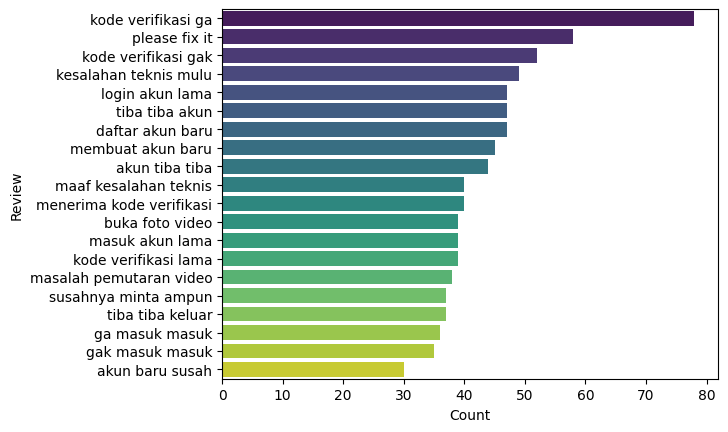

In [91]:
sns.barplot(y=df_neg_trigram['Review'], x=df_neg_trigram['Count'], palette = "viridis")

# Model Development

In [15]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.6 MB/s eta 0:00:00


## Model Load

In [16]:
#Clone repositori berisi dataset dan model indobenchmark untuk proses NLP
!git clone https://github.com/indobenchmark/indonlu.git

Cloning into 'indonlu'...
remote: Enumerating objects: 500, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 500 (delta 115), reused 139 (delta 110), pack-reused 316
Receiving objects: 100% (500/500), 9.45 MiB | 16.35 MiB/s, done.
Resolving deltas: 100% (235/235), done.


In [68]:
from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
import torch
import random
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm
from indonlu.utils.forward_fn import forward_sequence_classification
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader

In [69]:
def document_sentiment_metrics_fn(list_hyp, list_label):
    metrics = {}
    metrics["ACC"] = accuracy_score(list_label, list_hyp)
    metrics["F1"] = f1_score(list_label, list_hyp, average='macro', zero_division = 1)
    metrics["REC"] = recall_score(list_label, list_hyp, average='macro', zero_division = 1)
    metrics["PRE"] = precision_score(list_label, list_hyp, average='macro', zero_division = 1)
    return metrics

In [60]:
###
# common functions
###
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

In [61]:
# Set random seed
set_seed(20062001)

In [62]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = DocumentSentimentDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
train_dataset_path = '/content/train.tsv'
valid_dataset_path = '/content/eval.tsv'
test_dataset_path = '/content/test.tsv'

In [72]:
train_dataset = DocumentSentimentDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = DocumentSentimentDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = DocumentSentimentDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = DocumentSentimentDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=True)
valid_loader = DocumentSentimentDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=False)
test_loader = DocumentSentimentDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=False)

In [65]:
w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'positive': 0, 'neutral': 1, 'negative': 2}
{0: 'positive', 1: 'neutral', 2: 'negative'}


## Fine Tuning

In [66]:
optimizer = optim.Adam(model.parameters(), lr=3e-6)
model = model.cuda()

In [73]:
# Train
n_epochs = 5
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Calculate evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))


(Epoch 1) TRAIN LOSS:0.4585 LR:0.00000300: 100%|██████████| 1626/1626 [05:53<00:00,  4.60it/s]


(Epoch 1) TRAIN LOSS:0.4585 ACC:0.84 F1:0.58 REC:0.60 PRE:0.73 LR:0.00000300


VALID LOSS:0.4641 ACC:0.84 F1:0.58 REC:0.60 PRE:0.71: 100%|██████████| 697/697 [02:46<00:00,  4.18it/s]


(Epoch 1) VALID LOSS:0.4641 ACC:0.84 F1:0.58 REC:0.60 PRE:0.71


(Epoch 2) TRAIN LOSS:0.4323 LR:0.00000300: 100%|██████████| 1626/1626 [05:51<00:00,  4.62it/s]


(Epoch 2) TRAIN LOSS:0.4323 ACC:0.85 F1:0.60 REC:0.61 PRE:0.74 LR:0.00000300


VALID LOSS:0.4676 ACC:0.84 F1:0.59 REC:0.60 PRE:0.73: 100%|██████████| 697/697 [02:46<00:00,  4.20it/s]


(Epoch 2) VALID LOSS:0.4676 ACC:0.84 F1:0.59 REC:0.60 PRE:0.73


(Epoch 3) TRAIN LOSS:0.4064 LR:0.00000300: 100%|██████████| 1626/1626 [05:51<00:00,  4.63it/s]


(Epoch 3) TRAIN LOSS:0.4064 ACC:0.86 F1:0.62 REC:0.62 PRE:0.74 LR:0.00000300


VALID LOSS:0.4785 ACC:0.84 F1:0.59 REC:0.60 PRE:0.65: 100%|██████████| 697/697 [02:44<00:00,  4.23it/s]


(Epoch 3) VALID LOSS:0.4785 ACC:0.84 F1:0.59 REC:0.60 PRE:0.65


(Epoch 4) TRAIN LOSS:0.3782 LR:0.00000300: 100%|██████████| 1626/1626 [05:50<00:00,  4.64it/s]


(Epoch 4) TRAIN LOSS:0.3782 ACC:0.87 F1:0.64 REC:0.64 PRE:0.76 LR:0.00000300


VALID LOSS:0.4939 ACC:0.84 F1:0.60 REC:0.60 PRE:0.65: 100%|██████████| 697/697 [02:43<00:00,  4.25it/s]


(Epoch 4) VALID LOSS:0.4939 ACC:0.84 F1:0.60 REC:0.60 PRE:0.65


(Epoch 5) TRAIN LOSS:0.3499 LR:0.00000300: 100%|██████████| 1626/1626 [05:52<00:00,  4.61it/s]


(Epoch 5) TRAIN LOSS:0.3499 ACC:0.88 F1:0.67 REC:0.66 PRE:0.78 LR:0.00000300


VALID LOSS:0.5146 ACC:0.83 F1:0.60 REC:0.60 PRE:0.62: 100%|██████████| 697/697 [02:47<00:00,  4.17it/s]


(Epoch 5) VALID LOSS:0.5146 ACC:0.83 F1:0.60 REC:0.60 PRE:0.62


In [74]:
# Evaluate on test
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
list_hyp, list_label = [], []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    list_hyp += batch_hyp

# Save prediction
df_pred = pd.DataFrame({'label':list_hyp}).reset_index()

100%|██████████| 581/581 [00:43<00:00, 13.28it/s]


In [75]:
df_pred

,index,label
0,0,negative
1,1,negative
2,2,negative
3,3,positive
4,4,negative
...,...,...
18575,18575,positive
18576,18576,positive
18577,18577,positive
18578,18578,negative


In [76]:
df_pred.to_csv('pred.txt', index=False)

## Model Testing

In [77]:
text = 'loading mulu nih, lama'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: loading mulu nih, lama | Label : negative (83.590%)


In [79]:
text = 'berguna banget buat cari info up to date'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: berguna banget buat cari info up to date | Label : positive (98.231%)


# Model Export

In [88]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))